## 7.12.23

Compositional Analysis COPD dataset (see ScCoda_COPD.ipynb) using MILO and the single cell best practices tutorial https://www.sc-best-practices.org/conditions/compositional.html#without-labeled-clusters

In [1]:
import scanpy as sc
import pertpy as pt
import matplotlib.pyplot as plt
import numpy as np
import scvi
import rpy2

/Users/egerc/miniforge3/envs/milo-env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sc.logging.print_versions()

-----
anndata     0.10.3
scanpy      1.9.6
-----
PIL                 10.1.0
absl                NA
adjustText          0.8
aiohttp             3.9.1
aiosignal           1.3.1
annotated_types     0.6.0
anyio               NA
appnope             0.1.3
arrow               1.3.0
arviz               0.16.1
asttokens           NA
async_timeout       4.0.3
attr                23.1.0
backoff             2.2.1
bs4                 4.12.2
certifi             2023.11.17
cffi                1.16.0
charset_normalizer  3.3.2
chex                0.1.7
click               8.1.7
colorama            0.4.6
comm                0.1.4
contextlib2         NA
croniter            NA
custom_inherit      2.4.1
cycler              0.12.1
cython_runtime      NA
dateutil            2.8.2
debugpy             1.8.0
decorator           5.1.1
decoupler           1.5.0
deepdiff            6.7.1
docrep              0.3.2
etils               1.5.2
exceptiongroup      1.2.0
executing           2.0.1
fastapi             0.10

In [3]:
adata = sc.read_h5ad("Marburg_cell_states_locked_scANVI_ctl230901.raw.h5ad")
print(adata)

AnnData object with n_obs × n_vars = 97573 × 27208
    obs: 'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'mt', 'ribo'
    obsm: 'X_scANVI', 'X_scVI', 'X_umap'


In [4]:
adata
adata.obs

,sex,age,ethnicity,PaCO2,donor,infection,disease,SMK,illumina_stimunr,bd_rhapsody,...,group,Viral_score,cell_type,cell_states,leiden,cell_compartment,seed_labels,_scvi_batch,_scvi_labels,C_scANVI
493638-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.993291,ciliated,OMG+Ciliated,MultiC_0,Ciliated,Ciliated,0,1,Ciliated
816750-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.685051,ciliated,APOD+Ciliated,MultiC_1,Ciliated,Ciliated,0,1,Ciliated
678000-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-0.506433,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Ciliated
247802-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.299193,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
177433-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,healthy_ctrl,-1.502644,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097861-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.114714,mixed,IGFBP6+Basal,Mixed_7,Basal,Basal,0,0,Basal
7239232-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-3.002878,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
5330709-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-2.085706,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB
1638545-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,copd_iav,-1.008348,mixed,SERPINE1+Basal,Mixed_3,Basal,Basal,0,0,Basal


In [5]:
adata.obs["infection&disease"] = adata.obs["infection"].str.cat(adata.obs["disease"], sep = "&")
adata.obs

,sex,age,ethnicity,PaCO2,donor,infection,disease,SMK,illumina_stimunr,bd_rhapsody,...,Viral_score,cell_type,cell_states,leiden,cell_compartment,seed_labels,_scvi_batch,_scvi_labels,C_scANVI,infection&disease
493638-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-0.993291,ciliated,OMG+Ciliated,MultiC_0,Ciliated,Ciliated,0,1,Ciliated,CTRL&healthy
816750-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-1.685051,ciliated,APOD+Ciliated,MultiC_1,Ciliated,Ciliated,0,1,Ciliated,CTRL&healthy
678000-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-0.506433,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Ciliated,CTRL&healthy
247802-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-1.299193,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club,CTRL&healthy
177433-ST07_CSE_CTRL-V1,male,67,caucasian,88.8,GNR-06,CTRL,healthy,7,21_0017,1,...,-1.502644,ciliated,TCN1+Club,MultiC_3,Club,Club,0,2,Club,CTRL&healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2097861-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-2.114714,mixed,IGFBP6+Basal,Mixed_7,Basal,Basal,0,0,Basal,IAV&COPD
7239232-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-3.002878,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB,IAV&COPD
5330709-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-2.085706,mixed,KRT16+SupraB,Mixed_9,SupraB,SupraB,0,8,SupraB,IAV&COPD
1638545-CSE03_IAV-V6,male,66,caucasian,76.8,CSE-03,IAV,COPD,8,21_0507,6,...,-1.008348,mixed,SERPINE1+Basal,Mixed_3,Basal,Basal,0,0,Basal,IAV&COPD


In [6]:
milo = pt.tl.Milo()
mdata = milo.load(adata)
mdata

MuData object with n_obs × n_vars = 97573 × 27208
  2 modalities
    rna:	97573 x 27208
      obs:	'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'infection&disease'
      var:	'mt', 'ribo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap'
    milo:	0 x 0

In [7]:
# use logcounts to calculate PCA and neighbors
adata.layers["counts"] = adata.X.copy()
adata.layers["logcounts"] = sc.pp.log1p(adata.layers["counts"]).copy()
adata.X = adata.layers["logcounts"].copy()

sc.pp.highly_variable_genes(
    adata, n_top_genes=3000, subset=False
)  # 3k genes as used by authors for clustering

sc.pp.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=30)
sc.tl.umap(adata)

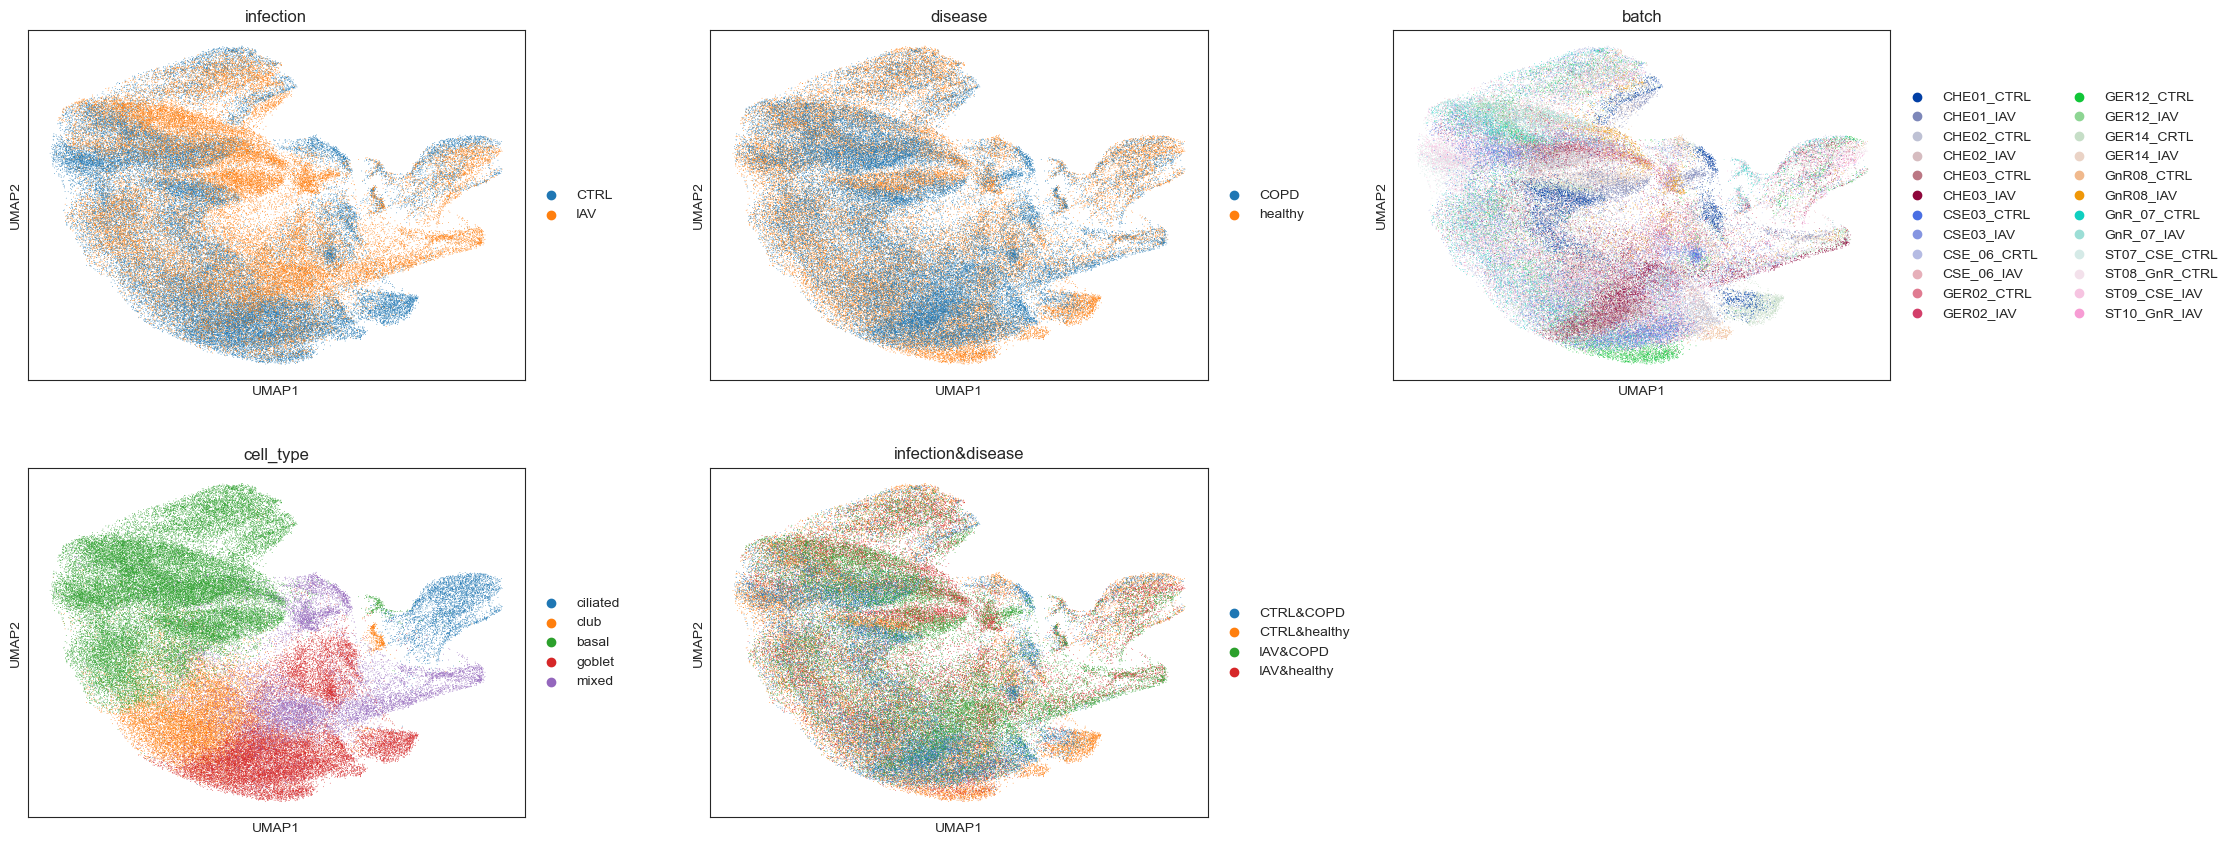

In [8]:
sc.pl.umap(adata, color=["infection", "disease", "batch", "cell_type", "infection&disease"], ncols=3, wspace=0.25)

In the single cell best practices tutorial there should be a batch correction step next. Skipped because theres no batch effect visible in this dataset.

In [9]:
milo.make_nhoods(mdata, prop=0.1)

In [10]:
adata.obsm["nhoods"]

<97573x8069 sparse matrix of type '<class 'numpy.float32'>'
	with 157055 stored elements in Compressed Sparse Row format>

Text(0, 0.5, '# neighbouthoods')

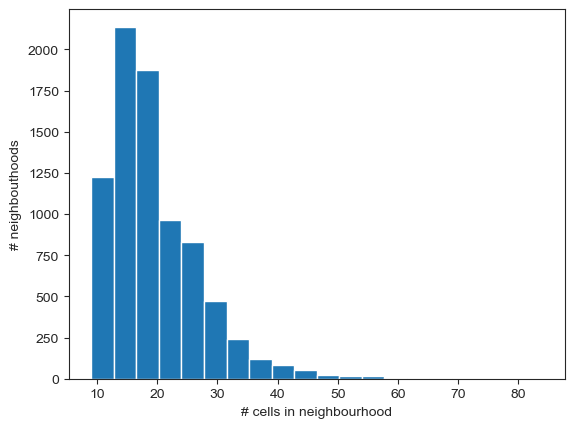

In [11]:
nhood_size = adata.obsm["nhoods"].toarray().sum(0)
plt.hist(nhood_size, bins=20)
plt.xlabel("# cells in neighbourhood")
plt.ylabel("# neighbouthoods")

In [12]:
np.median(nhood_size)

18.0

In [13]:
sc.pp.neighbors(adata, n_neighbors=50, use_rep="X_scVI", key_added="milo")
milo.make_nhoods(mdata, neighbors_key="milo", prop=0.1)

Text(0, 0.5, '# neighbouthoods')

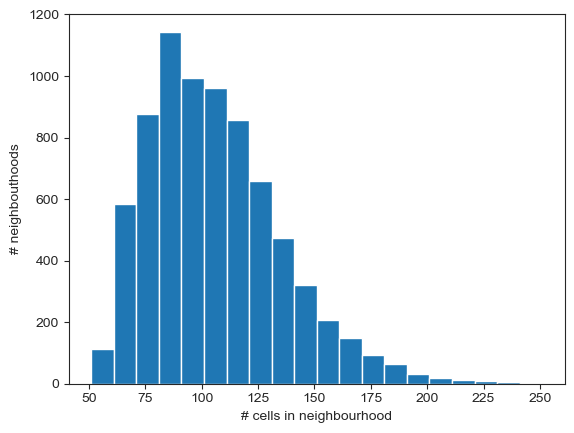

In [14]:
nhood_size = adata.obsm["nhoods"].toarray().sum(0)
plt.hist(nhood_size, bins=20)
plt.xlabel("# cells in neighbourhood")
plt.ylabel("# neighbouthoods")

In [15]:
np.median(nhood_size)

101.0

In [16]:
milo.count_nhoods(mdata, sample_col="batch")

MuData object with n_obs × n_vars = 97573 × 27208
  2 modalities
    rna:	97573 x 27208
      obs:	'sex', 'age', 'ethnicity', 'PaCO2', 'donor', 'infection', 'disease', 'SMK', 'illumina_stimunr', 'bd_rhapsody', 'n_genes', 'doublet_scores', 'predicted_doublets', 'batch', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'percent_mt2', 'n_counts', 'percent_chrY', 'XIST-counts', 'S_score', 'G2M_score', 'condition', 'sample_group', 'IAV_score', 'group', 'Viral_score', 'cell_type', 'cell_states', 'leiden', 'cell_compartment', 'seed_labels', '_scvi_batch', '_scvi_labels', 'C_scANVI', 'infection&disease', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance'
      var:	'mt', 'ribo', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
      uns:	'hvg', 'pca', 'neighbors', 'umap', 'infection_colors', 'disease_colors', 'batch_colors', 'cell_type_colors', 'infection&disease_colors', 'nhood_neighbors_key', 'milo'
      obsm:	'X_scANVI', 'X_scVI', 'X_umap', 'X_pca', 'nhoods'
      varm:	'PCs'
      layers:	'counts', 'logcounts'
      obsp:	'distances', 'connectivities', 'milo_distances', 'milo_connectivities'
    milo:	24 x 7571
      var:	'index_cell', 'kth_distance'
      uns:	'sample_col'

In [17]:
mdata["milo"]

AnnData object with n_obs × n_vars = 24 × 7571
    var: 'index_cell', 'kth_distance'
    uns: 'sample_col'

Text(0, 0.5, 'Mean # cells per sample in nhood')

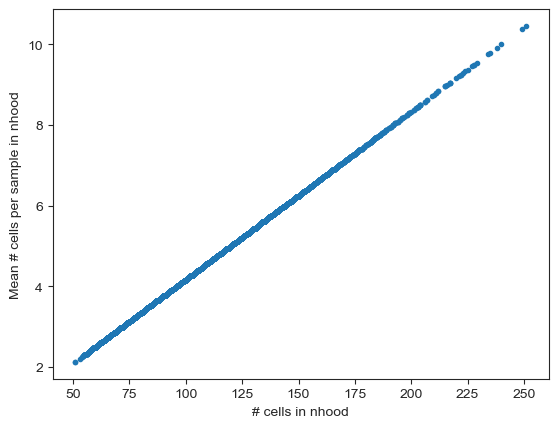

In [18]:
mean_n_cells = mdata["milo"].X.toarray().mean(0)
plt.plot(nhood_size, mean_n_cells, ".")
plt.xlabel("# cells in nhood")
plt.ylabel("Mean # cells per sample in nhood")

## 8.12.23

In [ ]:
milo.da_nhoods

In [20]:
milo.da_nhoods(
    mdata, design="~condition", model_contrasts="conditionCTRL&healthy-conditionIAV&healthy"
)
milo_results_salmonella = mdata["milo"].obs.copy()
milo_results_salmonella

Install Bioconductor library `'edgeR'` first as `BiocManager::install('edgeR').`

PackageNotInstalledError: The R package "edgeR" is not installed.